In [12]:
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np
from numpy.fft import fft, ifft
import matplotlib.animation as animation

In [64]:
class WAVE():
    def __init__(self, sigma, x_start, x_end, dx, x0, k0, height, width,dt, nt):
        self.sigma= sigma
        self.x_start=x_start
        self.x_end=x_end
        self.dx=dx
        self.x0=x0
        self.k0=k0
        points = int((x_end -x_start)/dx)
        self.points = points
        self.x = np.linspace(x_start, x_end, points)
        # Gaussian Wave Packet
        self.psi = (1/((2*np.pi*sigma**2))**(1/4))*np.exp(-((self.x-x0)/(2*sigma))**2)*np.exp(1j*k0*self.x)
        #height for barrier
        self.prob = abs(self.psi)**2
        norm = sum(self.prob)
        self.prob /= norm
        self.psi /= norm**0.5
        self.height= height
        #width for barrier
        self.width = width
        # potential array, initially set to zero
        v = np.zeros(points)
        mid_value = int(points/2)
        end_points = int(width/dx) +  mid_value 
        v[mid_value:end_points] = height
        self.v = v
        self.dt=dt
        self.nt = nt
        laplace = np.zeros((self.points, self.points))
        
        for i in range(self.points):
            
            laplace[i,i]=2
            
            if i != 0:
                laplace[i-1,i]=-1
                laplace[i,i-1]=-1
        
        H = (1/(2*((self.dx)**2)) * laplace) + self.v
        Matrix_1 = (1+(dt/2j)*H)
        Matrix_2 = np.linalg.inv(1-(dt/2j)*H)
        
        self.Matrix_product = np.matmul(Matrix_2,Matrix_1)
        
        
    def psi(self):
        return f"{self.psi}"
    
    
   
    def plot(self):
        plt.figure()
        x = self.x
        y = self.prob
        z = self.v
        fig, ax1 = plt.subplots()

        color = 'tab:red'
        ax1.set_xlabel('Position (m)')
        ax1.set_ylabel('Probabilty Density', color=color)
        ax1.plot(x,y, color=color)
        ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()  
        color = 'tab:blue'
        ax2.set_ylabel('Potential(v)', color=color)  
        ax2.plot(x, z, color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        fig.tight_layout()  
        plt.show()
    def evolve(self):
        for i in range(1,self.nt):
            self.psi =  np.matmul(self.Matrix_product,self.psi)
            self.prob = abs(self.psi)**2
 
            norm = sum(self.prob)
            self.prob /= norm
            self.psi /= norm**0.5
 
        return self.prob



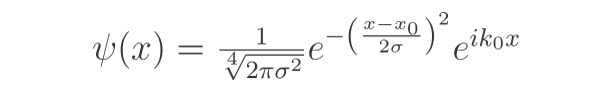

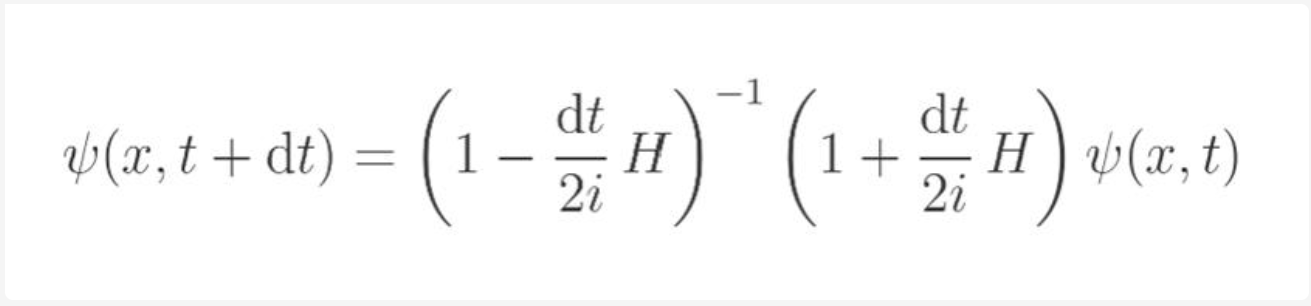

<Figure size 432x288 with 0 Axes>

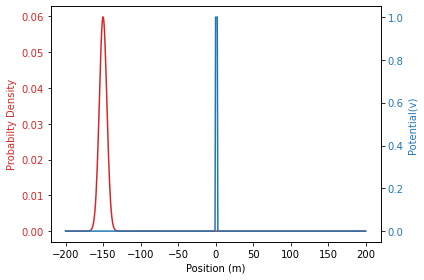

<Figure size 432x288 with 0 Axes>

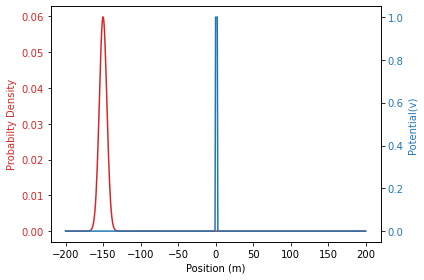

In [66]:
wave = WAVE(sigma=5, x_start=-200, x_end=200, dx=0.75, x0=-150, k0=1, height= 1, width=3, dt=0.5, nt = 500)
wave.plot()
wave.evolve()
wave.plot()




array([7.54859066e-19, 1.95060999e-20, 1.19390206e-19, 4.61050458e-21,
       1.22320224e-20, 2.85856834e-20, 9.55989095e-20, 2.07719935e-19,
       8.98902532e-19, 3.53591854e-18, 1.25458297e-17, 4.47100926e-17,
       1.55340316e-16, 5.28861138e-16, 1.75404688e-15, 5.68533693e-15,
       1.80106951e-14, 5.57907536e-14, 1.68953590e-13, 5.00193993e-13,
       1.44780558e-12, 4.09700115e-12, 1.13343456e-11, 3.06555257e-11,
       8.10584482e-11, 2.09539666e-10, 5.29557921e-10, 1.30839857e-09,
       3.16042839e-09, 7.46330658e-09, 1.72304266e-08, 3.88901924e-08,
       8.58150541e-08, 1.85125482e-07, 3.90434552e-07, 8.05025457e-07,
       1.62274513e-06, 3.19794024e-06, 6.16126243e-06, 1.16050871e-05,
       2.13700942e-05, 3.84719146e-05, 6.77111977e-05, 1.16508208e-04,
       1.95989084e-04, 3.22319496e-04, 5.18227671e-04, 8.14580397e-04,
       1.25177606e-03, 1.88060966e-03, 2.76216753e-03, 3.96625562e-03,
       5.56789091e-03, 7.64152551e-03, 1.02529479e-02, 1.34492096e-02,
      

In [ ]:

class Animator:
    def __init__(self, wave_packet):
        self.time = 0.0
        self.wave_packet = wave_packet
        self.fig, self.ax = plt.subplots()
        plt.plot(self.wave_packet.x, self.wave_packet.potential * 0.1, color='r')
         
        self.time_text = self.ax.text(0.05, 0.95, '', horizontalalignment='left',
            verticalalignment='top', transform=self.ax.transAxes)
        self.line, = self.ax.plot(self.wave_packet.x, self.wave_packet.evolve())
        self.ax.set_ylim(0, 0.2)
        self.ax.set_xlabel('Position (a$_0$)')
        self.ax.set_ylabel('Probability density (a$_0$)')
 
    def update(self, data):
        self.line.set_ydata(data)
        return self.line,
     
    def time_step(self):
        while True:
            self.time += self.wave_packet.dt
            self.time_text.set_text(
                'Elapsed time: {:6.2f} fs'.format(self.time * 2.419e-2))
           
            yield self.wave_packet.evolve()
     
    def animate(self):
        self.ani = animation.FuncAnimation(
            self.fig, self.update, self.time_step, interval=5, blit=False)
 
 
wave_packet = WavePacket(n_points=500, dt=0.5, barrier_width=10, barrier_height=1)
animator = Animator(wave_packet)
animator.animate()
plt.show()

In [28]:
class WAVE():
    def __init__(self, sigma, x_start, x_end, dx, x0, k0, height, width, step):
        self.sigma= sigma
        self.x_start=x_start
        self.x_end=x_end
        self.dx=dx
        self.x0=x0
        self.k0=k0
        points = int((x_end -x_start)/dx)
        self.points = points
        self.x = np.linspace(x_start, x_end, points)
        self.psi = (1/((2*np.pi*sigma**2))**(1/4))*np.exp(-((self.x-x0)/(2*sigma))**2)*np.exp(1j*k0*self.x)
        self.height= height
        self.width = width
        v = np.zeros(points)
        mid_values = int(points/2)
        end_points = int(width/dx) +  mid_values 
        v[mid_values:end_points] = height
        self.v = v
        self.step = step
    def func1(self):
        plt.figure()
        Y = fft(self.psi)
        N_0 = len(self.psi)
        N_1 = np.arange(len(self.psi))
        length = N_0/self.step
        f =N_1/length

        plt.stem(f, np.abs(Y))
    
    def func2(self):
        dt = 0.01
        tfinal = 1
        x0 = 0

        n = int(x_end/dx)
        x_00 = np.zeros(n+1, float)
        x_range = np.linspace(start=x_start,stop=x_end ,num=n+1)
        y[0] = x0
        

        for i in range(n):
            
            y[i+1] = y[i] + np.random.normal()

            x = x_range
            y = y



            fig, ax = func1

    def animate(i):
            
        ax.cla()
        ax.plot(x[:i], y[:i]) 
   
        anim = animation.FuncAnimation(fig, animate, frames = len(x) + 1, interval = 1, blit = False)
        plt.show()
      

<bound method WAVE.animate of <__main__.WAVE object at 0x7ff650292790>>

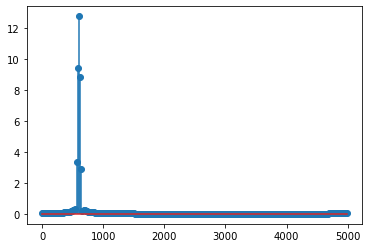

In [44]:
wave = WAVE(sigma=20, x_start=-100, x_end=100, dx=0.75, x0=50, k0=1, height= 5, width=10,step=5000)
wave.func1()

wave.animate

In [78]:

array = np.zeros ((4,4))

for i in range(4):
    
        
        array[i,i] = 2
       
        if i != 0:
             array[i-1,i]= -1
                
             array[i,i-1]= -1
            

print(array)
    



[[ 2. -1.  0.  0.]
 [-1.  2. -1.  0.]
 [ 0. -1.  2. -1.]
 [ 0.  0. -1.  2.]]
